# 04 UCB – The Upper Confidence Bound Algorithm

У алгоритмов, которые мы представили до сих пор, есть одна систематическая слабость: они не следят за тем, как много они знают о любой из доступных им рук. Они обращают внимание только на то, какое вознаграждение они получили от руки. Это означает, что они будут недостаточно изучать варианты, чей первоначальный опыт не принес вознаграждения, даже если у них недостаточно данных, чтобы быть уверенными в этих руках. Мы можем добиться большего, используя алгоритм, который обращает внимание не только на то, что он знает, но и на то, как много он знает.

Алгоритм UCB делает именно это. Прежде чем мы опишем, как алгоритм UCB следит за тем, сколько он знает, давайте вспомним алгоритмы epsilon-Greedy и Softmax и рассмотрим их с более абстрактной точки зрения. И алгоритм epsilon-Greedy, и алгоритм Softmax обладают следующими общими свойствами:

- По умолчанию алгоритм выбирает руку, которая в данный момент имеет наибольшее вознаграждение.
- Иногда алгоритм решает исследовать и выбирает не тот вариант, который в данный момент кажется лучшим:
    - Алгоритм epsilon-Greedy исследует, выбирая из всех рук совершенно случайным образом. Он принимает одно из этих случайных исследовательских решений с вероятностью epsilon.
    - Алгоритм Softmax использует случайный выбор из всех доступных рук с вероятностью, которая более или менее пропорциональна вознаграждению каждой из рук. Если другие руки заметно хуже лучшей руки, они выбираются с очень низкой вероятностью. Если же все руки имеют схожую ценность, то они выбираются почти одинаково часто.
- Для того чтобы добиться лучшей производительности, стремясь к тому, чтобы эти два алгоритма меньше исследовали со временем, можно настроить оба алгоритма на динамическое изменение их основных параметров с течением времени. Мы назвали эту модификацию отжигом.

Глядя на этот список, мы видим, как UCB может улучшить алгоритмы epsilon-Greedy и Softmax: он может принимать решения об исследовании, которые зависят от нашей уверенности в вознаграждении выбранной нами руки.

Почему важно следить за тем, насколько мы уверены в вознаграждении рук? Причина кроется в природе вознаграждений, которые мы получаем от рук: они шумные. Если мы используем наш прошлый опыт работы с рукой, то вознаграждение любой руки всегда является зашумленной оценкой истинной отдачи от инвестиций, которую мы можем от него ожидать. Из-за этого шума может быть просто совпадением, что рука A кажется лучше, чем рука B; если бы у нас было больше опыта работы с обеими руками, мы бы в конце концов поняли, что рука B на самом деле лучше. Алгоритмы epsilon-Greedy и Softmax не устойчивы к этому шуму во время первого опыта работы.

Или, выражаясь более человеческим языком, алгоритмы epsilon-Greedy и Softmax доверчивы. Их легко ввести в заблуждение несколькими негативными впечатлениями. Благодаря использованию случайности они могут исправить это позже. UCB использует совершенно другой подход. Как вы увидите, UCB вообще не использует случайность.

Вместо этого UCB избегает доверчивости, требуя от нас отслеживать степень доверия к нашим оценкам вознаграждений всех рук. Для этого нам нужно иметь некую метрику того, как много мы знаем о каждой руке.

К счастью, у нас уже есть информация, которая даст нам эту метрику: мы явно отслеживали количество раз, когда мы вытягивали каждую руку для обоих алгоритмов, которые мы использовали до сих пор. Внутри поля counts в классах epsilon-Greedy и Softmax у нас достаточно информации, чтобы вычислить простую метрику нашего доверия к оценкам вознаграждений различных рук. Осталось найти способ воспользоваться этой информацией.

Алгоритмы семейства UCB именно так и поступают. Собственно, их ориентация на уверенность и послужила источником названия UCB, которое является акронимом для Upper Confidence Bounds. Мы рассмотрим только один из алгоритмов семейства UCB. Этот частный случай называется алгоритмом UCB1. Обычно мы будем называть алгоритм UCB1 алгоритмом UCB, поскольку это будет единственная версия UCB, которую мы реализуем.

**Предупреждение** Мы не будем рассматривать другие варианты UCB, но отметим, что алгоритм UCB1, в отличие от своих собратьев, делает несколько предположений, с которыми вам следует быть осторожными. Главное из них - предположение о том, что максимально возможное вознаграждение имеет значение 1. Если в вашей ситуации это не так, то перед использованием алгоритма UCB1, который мы приводим ниже, вам нужно изменить масштаб всех ваших вознаграждений, чтобы они лежали между 0 и 1.

Помимо того, что алгоритм UCB явно отслеживает нашу уверенность в вознаграждении для каждой руки, он особенен еще по двум причинам:

- UCB вообще не использует случайность. В отличие от epsilon-Greedy или Softmax, можно точно знать, как поведет себя UCB в той или иной ситуации. Это иногда облегчает рассуждения.
- UCB не имеет никаких свободных параметров, которые нужно настроить перед развертыванием. Это значительное улучшение, если вы хотите использовать его в реальных проектах, потому что это означает, что вы можете начать использовать UCB, не имея четкого представления о том, как должен вести себя мир.

В совокупности использование явной меры доверия, отсутствие ненужной случайности и настраиваемых параметров делает UCB очень убедительным. UCB также очень прост для понимания, поэтому давайте просто представим алгоритм, а затем продолжим обсуждать его более подробно.

# Реализация UCB

In [1]:
import math

def ind_max(x):
    m = max(x)
    return x.index(m)

class UCB1:
    def __init__(self, counts, values):
        self.counts = counts
        self.values = values
  
    def initialize(self, n_arms):
        self.counts = [0 for col in range(n_arms)]
        self.values = [0.0 for col in range(n_arms)]
  
    def select_arm(self):
        n_arms = len(self.counts)
        for arm in range(n_arms):
            if self.counts[arm] == 0:
                return arm

        ucb_values = [0.0 for arm in range(n_arms)]
        total_counts = sum(self.counts)
        for arm in range(n_arms):
            bonus = math.sqrt((2 * math.log(total_counts)) / float(self.counts[arm]))
            ucb_values[arm] = self.values[arm] + bonus
        return ind_max(ucb_values)
  
    def update(self, chosen_arm, reward):
        self.counts[chosen_arm] = self.counts[chosen_arm] + 1
        n = self.counts[chosen_arm]

        value = self.values[chosen_arm]
        new_value = ((n - 1) / float(n)) * value + (1 / float(n)) * reward
        self.values[chosen_arm] = new_value

In [2]:
def test_algorithm(algo, arms, num_sims, horizon):
    '''
    algo:
    arms:
    num_sims:
    horizon:
    '''
    chosen_arms = [0.0 for i in range(num_sims * horizon)]
    rewards = [0.0 for i in range(num_sims * horizon)]
    cumulative_rewards = [0.0 for i in range(num_sims * horizon)]
    sim_nums = [0.0 for i in range(num_sims * horizon)]
    times = [0.0 for i in range(num_sims * horizon)]

    for sim in range(num_sims):
        sim = sim + 1
        algo.initialize(len(arms))

        for t in range(horizon):
            t = t + 1
            index = (sim - 1) * horizon + t - 1
            sim_nums[index] = sim
            times[index] = t

            chosen_arm = algo.select_arm()
            chosen_arms[index] = chosen_arm

            reward = arms[chosen_arms[index]].draw()
            rewards[index] = reward

            if t == 1:
                cumulative_rewards[index] = reward
            else:
                cumulative_rewards[index] = cumulative_rewards[index - 1] + reward

            algo.update(chosen_arm, reward)

    return [sim_nums, times, chosen_arms, rewards, cumulative_rewards]

In [3]:
import random

class BernoulliArm:
    def __init__(self, p):
        self.p = p
    def draw(self):
        if random.random() > self.p:
            return 0.0
        else:
            return 1.0
        
random.seed(1)
means = [0.1, 0.12, 0.15]
n_arms = len(means)
random.shuffle(means)
arms = list(map(lambda mu: BernoulliArm(mu), means))
print("Best arm is " + str(ind_max(means)))

algo = UCB1([], [])
algo.initialize(n_arms)
results = test_algorithm(algo, arms, 5000, 250)

f = open("ucb1_results.tsv", "w")

for i in range(len(results[0])):
    f.write("\t".join([str(results[j][i]) for j in range(len(results))]) + "\n")

f.close()

Best arm is 1


# Анализ результатов исследования

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('ucb1_results.tsv', sep='\t', header=None)
df.columns = ['sim_nums', 'times', 'chosen_arms', 'rewards', 'cumulative_rewards']

## Подход 1: отслеживание вероятности выбора лучшей руки

In [6]:
kk = df[(df['chosen_arms']==1)].groupby(['times', 'chosen_arms']).size().reset_index()
kk.columns = ['times', 'chosen_arms', 'count']
kk['proba'] = kk['count']/5000

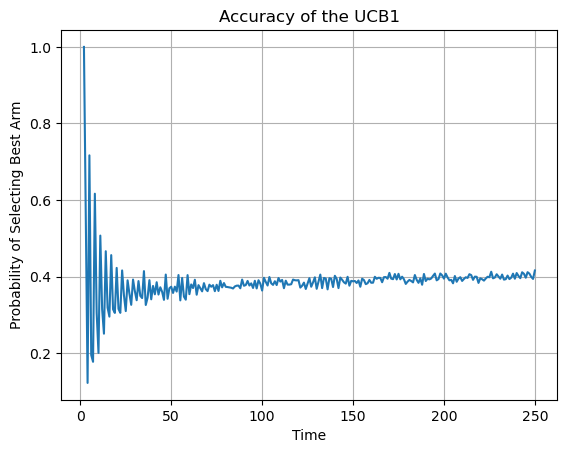

In [7]:
plt.plot(kk['times'], kk['proba'])

plt.xlabel('Time')
plt.ylabel('Probability of Selecting Best Arm')
plt.title('Accuracy of the UCB1')
plt.grid()
plt.show()

## Подход 2: отслеживание среднего вознаграждения в каждый момент времени

In [8]:
kk = df.groupby(['times']).mean().reset_index()

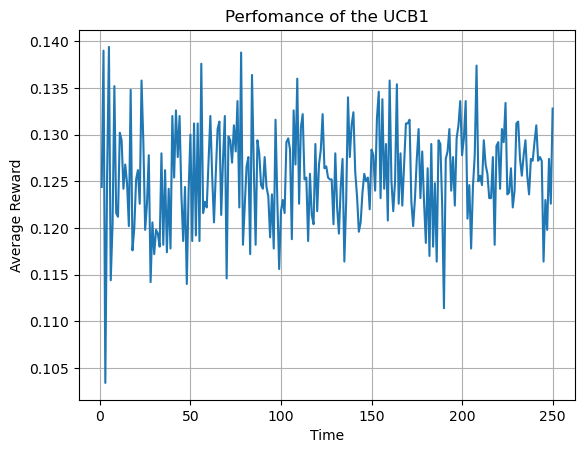

In [9]:
plt.plot(kk['times'], kk['rewards'])

plt.xlabel('Time')
plt.ylabel('Average Reward')
plt.title('Perfomance of the UCB1')
plt.grid()
plt.show()

## Подход 3: отслеживание совокупного вознаграждения в каждый момент времени

In [10]:
kk = df.groupby(['times']).mean().reset_index()

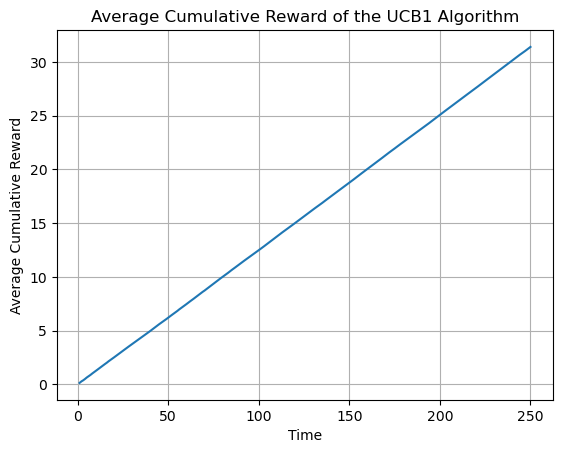

In [11]:
plt.plot(kk['times'], kk['cumulative_rewards'])
plt.xlabel('Time')
plt.ylabel('Average Cumulative Reward')
plt.title('Average Cumulative Reward of the UCB1 Algorithm')
plt.grid()
plt.show()